In [1]:
import h5py
import numpy as np
import glob, os
from astropy.time import Time

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
fig_width_pt = 3*246.0  # Get this from LaTeX using \showthe\columnwidth
inches_per_pt = 1.0/72.27               # Convert pt to inch
golden_mean = (np.sqrt(5)-1.0)/2.0         # Aesthetic ratio
fig_width = fig_width_pt*inches_per_pt  # width in inches
fig_height = fig_width*golden_mean      # height in inches
fig_size =  [fig_width,fig_height]

params = { 'axes.labelsize': 24,
          'font.family': 'serif',
          'font.serif': 'Computer Modern Raman',
          'font.size': 24,
          'legend.fontsize': 20,
          'xtick.labelsize': 24,
          'ytick.labelsize': 24,
          'axes.grid' : True,
          'text.usetex': True,
          'savefig.dpi' : 100,
          'lines.markersize' : 14,
          'figure.figsize': fig_size}

mpl.rcParams.update(params)

In [3]:
f = h5py.File('/work/ahnitz/WWW/4ogc/4-ogc.hdf','r')

In [4]:
f.keys()

<KeysViewHDF5 ['H1_chisq', 'H1_end_time', 'H1_sg_chisq', 'H1_snr', 'L1_chisq', 'L1_end_time', 'L1_sg_chisq', 'L1_snr', 'V1_chisq', 'V1_end_time', 'V1_sg_chisq', 'V1_snr', 'ifar', 'mass1', 'mass2', 'name', 'obs', 'pastro', 'spin1z', 'spin2z', 'stat', 'time', 'trig']>

In [5]:
l = (f['mass1'][:] > 30) & (f['mass2'][:] > 30) & (f['ifar'][:] > 0.001)

In [6]:
len(l[l==True])

142

In [7]:
l.sum()

142

In [30]:
ltime = (f['time'][:] > Time('2020-03-01T00:00:00').gps) & (f['time'][:] < Time('2020-03-01T00:10:00').gps) & \
        (f['mass1'][:]>1) & (f['mass2'][:]>1) & (f['ifar'][:] != -1.0)
t = f['time'][ltime]
ifar = f['ifar'][ltime]
stat = f['stat'][ltime]

In [31]:
ifar

array([1.38838874e-07, 1.13568209e-07, 2.79479450e-06, 1.15876178e-07,
       2.25819672e-07, 2.42803710e-07, 2.26265073e-07, 1.62198917e-06,
       1.83968817e-07, 3.26010624e-07, 1.69516192e-07, 4.09782144e-07,
       3.35532404e-07, 2.00003944e-07, 1.35148749e-07, 1.61515213e-06,
       7.31208768e-06, 4.44287189e-07, 9.46597339e-08, 1.97551538e-07,
       1.31611235e-07, 2.79897217e-07, 2.69217860e-07, 5.46549270e-07,
       1.06851676e-07, 1.13217584e-07, 1.14992512e-07, 4.00251956e-07,
       5.19312546e-07, 7.94151319e-07, 2.51429388e-07, 1.34521156e-07,
       1.98019522e-07, 2.79659397e-07, 1.96063547e-07, 1.13607617e-07,
       3.27802610e-07, 5.00142848e-07, 1.48665927e-07, 9.20449587e-07,
       4.42060685e-07, 2.36107550e-06, 3.82617417e-07, 2.17893843e-07,
       1.62625051e-07, 2.87065462e-07, 3.38980577e-06, 2.26265073e-07,
       1.52676002e-06, 1.56878449e-06, 3.06851683e-06, 8.98532390e-07,
       1.66736811e-07, 7.82816734e-08, 2.96512755e-07, 1.69873602e-07,
      

In [32]:
stat

array([-1.80172157e+00, -8.35006332e+00, -2.19640994e+00, -2.80445933e+00,
       -7.65040398e+00,  9.54312742e-01, -2.36406493e+00,  4.55342102e+00,
       -8.31185913e+00,  9.22728479e-01, -8.60048294e+00,  2.10107636e+00,
       -9.80606198e-01, -3.03419471e-01, -5.46647453e+00,  3.80208635e+00,
       -5.72816432e-01, -3.35421562e-02, -4.76279354e+00,  4.44386065e-01,
       -9.64329815e+00, -1.60559106e+00, -7.14259529e+00,  2.66992164e+00,
       -3.39165282e+00, -1.04327259e+01, -7.98827267e+00, -6.11202812e+00,
        2.57248211e+00,  1.15640235e+00,  3.43392730e-01, -5.52077484e+00,
       -8.06386471e+00,  5.85694373e-01, -8.09740925e+00, -8.33695984e+00,
        1.63863266e+00,  1.78834915e+00, -5.35754144e-01,  1.43480957e+00,
       -5.87322426e+00,  5.11718369e+00,  1.25694644e+00, -7.75887060e+00,
       -3.98140979e+00, -6.96794415e+00,  4.91149330e+00, -2.36483955e+00,
        4.45956421e+00, -3.24177265e+00,  3.43685055e+00,  3.58050680e+00,
       -8.65982437e+00, -

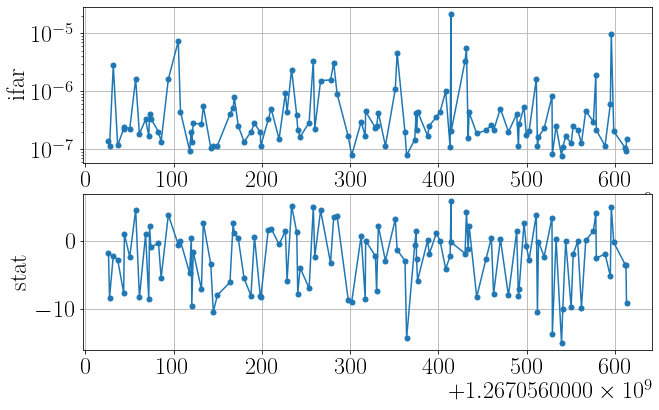

In [35]:
fig = plt.figure()
ms=5
ax = fig.add_subplot(211)
ax.plot(t,ifar,marker='o',ms=ms)
ax.set_yscale('log')
ax.set_ylabel('ifar')
bx = fig.add_subplot(212)
bx.plot(t,stat,marker='o',ms=ms)
bx.set_ylabel('stat')
fig.align_xlabels()

# So where does negative stat come from?

### Notes: ./copy/compile/
bbh.hdf, bns.hdf, and nsbh.hdf are template banks

{bbh, bns, nsbh}_{H1, L1}.hdf is single detector triggers

In [36]:
f = h5py.File('./copy/compile/o1o2o3a_coincs.hdf','r')

In [37]:
f.keys()

<KeysViewHDF5 ['H1_chisq', 'H1_end_time', 'H1_sg_chisq', 'H1_snr', 'L1_chisq', 'L1_end_time', 'L1_sg_chisq', 'L1_snr', 'V1_chisq', 'V1_end_time', 'V1_sg_chisq', 'V1_snr', 'ifar', 'mass1', 'mass2', 'spin1z', 'spin2z', 'stat']>

In [38]:
f = h5py.File('./copy/compile/bbh.hdf','r')

In [39]:
f.keys()

<KeysViewHDF5 ['approximant', 'f_lower', 'mass1', 'mass2', 'spin1z', 'spin2z']>

In [40]:
f = h5py.File('./copy/compile/bbh_H1_trigs.hdf','r')

In [41]:
f.keys()

<KeysViewHDF5 ['chisq', 'sg_chisq', 'snr', 'stat', 'tid', 'time']>

In [47]:
k = np.ones(len(f['chisq']),dtype=bool)

In [48]:
f['chisq'][k]

array([0.94310195, 1.23914811, 0.97312706, ..., 0.81201359, 0.90111299,
       0.82589907])

In [50]:
from pycbc.dq import query_flag
segs = {'H1':[], 'L1':[], 'V1':[]}
for ifo in ['H1', 'L1', 'V1']:
    for s, e in [(1126051217, 1137254417), (1164556817, 1187733618), (1238166018, 1253977218),  (1253977219, 1320363336)]:
        if ifo == 'V1' and s == 1126051217:
            continue
        segs[ifo] +=  query_flag(ifo, 'DATA', s, e, cache=True)

In [53]:
t=Time('1126051217',format='gps')

In [62]:
t.datetime64

numpy.datetime64('2015-09-12T00:00:36.000000000')

In [64]:
segs.keys()

dict_keys(['H1', 'L1', 'V1'])

In [65]:
f = h5py.File('./copy/compile/pastro_H1_bbh_single.hdf','r')

In [66]:
f.keys()

<KeysViewHDF5 ['pastro', 'time']>

In [68]:
f['pastro'][:]

array([0.        , 0.        , 0.        , 0.        , 0.65820356])

In [69]:
f = h5py.File('./copy/compile/pastro_L1_bbh_single.hdf','r')

In [71]:
f['pastro'][:]

array([0.52671383, 0.72537163, 0.72942365, 0.77138193, 0.78411081])

In [73]:
d = np.loadtxt('./copy/compile/coinc_pastro.txt', dtype=str)

In [74]:
d

array([['1266645879.40', '2020-02-25', '06:04:21.398193', '37.92',
        'H1L1', '1.00'],
       ['1266618172.40', '2020-02-24', '22:22:34.400146', '83.06',
        'H1L1V1', '1.00'],
       ['1267132237.66', '2020-03-01', '21:10:19.661133', '4.70', 'H1L1',
        '0.43'],
       ['1262353301.93', '2020-01-06', '13:41:23.925293', '5.41',
        'H1L1V1', '0.69'],
       ['1256999739.93', '2019-11-05', '14:35:21.930664', '16.68',
        'H1L1V1', '1.00'],
       ['1256772098.02', '2019-11-02', '23:21:20.023926', '3.25',
        'H1L1V1', '0.22'],
       ['1263744929.34', '2020-01-22', '16:15:11.340820', '3.22', 'H1L1',
        '0.27'],
       ['1257906499.42', '2019-11-16', '02:28:01.423828', '3.52',
        'H1L1V1', '0.22'],
       ['1260567236.48', '2019-12-16', '21:33:38.479248', '63.24',
        'H1V1', '1.00'],
       ['1260484270.33', '2019-12-15', '22:30:52.333740', '26.43',
        'H1L1V1', '1.00'],
       ['1267381378.62', '2020-03-04', '18:22:40.619141', '3.02', 'H1L1',

extract/coincs/extract.py --> coincs.hdf

*MERGER*.hdf ---> *COMBINE*.hdf

compile/compile.ipynb --> combine events (coinc and single), add pastro, adjust IFAR